<a href="https://colab.research.google.com/github/Scrabby1/ADA-Informes/blob/main/Informe_BST_optimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Descripción del problema

**Entrada:** Secuencia ordenada de **n** claves. Cada clave tiene una probabilidad de ser buscada. Existen claves ficticias que representan búsquedas fallidas. Cada clave ficticia tiene una probabilidad de ser buscada. La suma de estas probabilidades y las de las claves comunes debe ser uno.

**Salida:** Un árbol de búsqueda optimo, ósea un árbol que minimice el costo esperado (cantidad de nodos visitados).

Cuando hacemos un algoritmo para encontrar una solución, siempre se quiere encontrar la solución más eficiente de todas, este tipo de problema se llaman problemas de optimización, en este informe se vera la solución para encontrar un árbol el cual contiene el menor coste esperado, esto lo hará el algoritmo del árbol de búsqueda binario optimo.

El problema de este problema va a ser la entrada del arreglo, en este caso el tamaño de la secuencia con las claves

#2.Árbol de busqueda binario optimo

In [42]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)

In [43]:
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

Version recursiva

In [49]:
cont = 0
def optCost(freq, i, j,verbose=False):
    if j < i:
        if(verbose==True):
          print("No se encuentran elementos.Se debe retornar 0")   
        return 0
    if j == i:
        if(verbose==True):
          print("Solo hay un elemento en este subarreglo,se debe retornar este.")   
        return freq[i]
    
    if(verbose==True):
      print("arreglo de probabilidades actual:",freq[i:j+1])
    fsum = Sum(freq, i, j)
    if(verbose==True):
      print("Suma de probabilidades:",fsum)
    Min = 999999999999
    for r in range(i, j + 1):
        global cont;
        cont+=2

        if(verbose==True):
          print("----------------------------------------------------------------------")

        coste = (optCost(freq, i, r - 1,verbose) +
                optCost(freq, r + 1, j,verbose))
        
        if(verbose==True):
          print("Se encontro el siguiente costo:",coste)

        if coste < Min:
            if(verbose==True):
              print("El costo encontrado es menor que el menor costo encontrado por lo que se actualizara el menor costo encontrado")
            Min = coste
    return Min + fsum

def optimalSearchTreeRecursivo(keys, freq, n,verbose=False):
    return optCost(freq, 0, n - 1,verbose)


In [45]:
if __name__ == '__main__':
    keys = [10, 12, 20]
    freq = [34, 8, 50]
    cont=0
    n = len(keys)
    print("Coste del BST optimo es",
           optimalSearchTreeRecursivo(keys, freq, n))
    print("llamadas:",cont)

Coste del BST optimo es 142
llamadas: 14


Version dinamica

In [52]:
INT_MAX = 2147483647
subProblemas=0
def optimalSearchTreeDinamico(keys, freq, n,verbose=False):
    coste = [[0 for x in range(n)]
               for y in range(n)]
    
    if(verbose==True):
      print("Se construye matriz nxn")

    for i in range(n):
        coste[i][i] = freq[i]

    for L in range(2, n + 1):

        for i in range(n - L + 1):
            j = i + L - 1

            off_set_sum = Sum(freq, i, j)
            if(verbose==True):
              print("Se calcula la suma de las probabilidades")

            if i >= n or j >= n:
                break

            if(verbose==True):
              print("Se inicia la posicion[",i,"][",j,"]")
              print("con la variable maxima")
              print("----------------------------------------------------------------------")
              

            coste[i][j] = INT_MAX

            for r in range(i, j + 1):
                global subProblemas

                c = 0

                if (r > i):

                    if(verbose==True):
                      print(r,">",i)

                    c += coste[i][r - 1]

                if (r < j):

                    if(verbose==True):
                      print(r,"<",j)

                    c += coste[r + 1][j]

                c += off_set_sum
                subProblemas+=1

                if (c < coste[i][j]):

                    if(verbose==True):
                      print(c,"<",coste[i][j])

                    coste[i][j] = c

    return coste[0][n - 1]

In [47]:
if __name__ == '__main__':
    keys = [10, 12, 20]
    freq = [34, 8, 50]
    n = len(keys)
    print("Coste del BST optimo es",
           optimalSearchTreeDinamico(keys, freq, n))

Coste del BST optimo es 142


##2.1.Descripción del algoritmo

Ambas versiones de este algoritmo tienen el mismo objetivo, a base de dos arreglos claves **key** y sus probabilidades **prob** debe retornar una suma la cual es el costo esperado ósea la cantidad de nodos que se deben visitar para llegar a la ubicación deseada

Estos algoritmos poseen una subestructura optima la cual es la siguiente:

Captura de pantalla 2022-10-14 140733.png

Para encontrar el resultado debemos calcular **optcost(0,n-1)**

La idea de la fórmula de arriba es la siguiente uno por uno consideraremos los nodos como raíces (r varia de i hasta j en el segundo termino). Cuando llegamos al r-ésimo nodo como raíz, nosotros recursivamente calcularemos el costo optimo desde i hasta r-1 y r+1 hasta j

Agregamos una suma de probabilidades desde i hasta j. La razón de esto es debido a que a medida que tomamos r como raíz, entonces todos los elementos que van en el nivel 1 hacia abajo es calculado en un subproblema.


**Versión recursiva:** Para esta versión se compone de dos funciones, la primera que recibe el arreglo de claves keys, las probabilidades de las claves prob y el tamaño del arreglo de claves n, luego esta primera llama a la segunda con los siguientes parámetros las probabilidades de las claves, la posición inicial 0 y la posición final n-1

La segunda función se encarga de realizar todo, esta funciona recursivamente sus casos bases son cuando el índice j es menor que el i, cuando ocurre debe retornar 0, esto significa que no hay elementos en el arreglo que se recibió, el otro caso base es cuando el índice j es igual a i, esto significa que solo hay un elemento

Luego para el resto de los casos se hace lo siguiente, se obtiene la sumatoria de las probabilidades desde i hasta j. Luego se define un valor mínimo, en un ciclo se empieza a recorrer el arreglo dado, cada iteración se calcula el costo de manera recursiva desde los lados izquierdo y derecho de la posición que estamos moviéndonos, si el costo calculado es menor al valor mínimo se le asigna el coste. Al final se retornara la suma del valor mínimo y la sumatoria de probabilidades


**Versión dinámica:** Este algoritmo crea una matriz para guardar los costes calculados

Primero se guardara el resultado para una simple clave, ese resultado es la probabilidad misma de la clave

Ahora se deben considerar todas las cadenas posibles, ósea las cadenas con 2 claves, tres claves etc.

para poder ver todos estos datos vamos a utilizar un ciclo iterativo, las i serán las filas de la matriz de coste y j serán las columnas, vamos a recorrer los costos guardados en nuestra matriz y con esos vamos a ir visitando las claves como raíces y el resultado optimo será guardado en la posición correcta.

Como salida de ambos algoritmos vamos a tener el coste más eficiente del coste esperado del árbol

##2.2.Ejecución con verbose (Recursivo)

In [50]:
import random
a= random.sample(range(1,100),3)
b= random.sample(range(1,100),3)
print("Arreglo de claves:",a)
print("Arreglo de probabilidades:",b)
n=3
print("Coste del BST optimo es",optimalSearchTreeRecursivo(keys, freq, n,True))

Arreglo de claves: [54, 63, 48]
Arreglo de probabilidades: [47, 95, 82]
arreglo de probabilidades actual: [34, 8, 50]
Suma de probabilidades: 92
----------------------------------------------------------------------
No se encuentran elementos.Se debe retornar 0
arreglo de probabilidades actual: [8, 50]
Suma de probabilidades: 58
----------------------------------------------------------------------
No se encuentran elementos.Se debe retornar 0
Solo hay un elemento en este subarreglo,se debe retornar este.
Se encontro el siguiente costo: 50
El costo encontrado es menor que el menor costo encontrado por lo que se actualizara el menor costo encontrado
----------------------------------------------------------------------
Solo hay un elemento en este subarreglo,se debe retornar este.
No se encuentran elementos.Se debe retornar 0
Se encontro el siguiente costo: 8
El costo encontrado es menor que el menor costo encontrado por lo que se actualizara el menor costo encontrado
Se encontro el sig

##2.3.Ejecución con verbose (Dinámico)

In [53]:
import random
a= random.sample(range(1,100),3)
b= random.sample(range(1,100),3)
print("Arreglo de claves:",a)
print("Arreglo de probabilidades:",b)
n=3
print("Coste del BST optimo es",optimalSearchTreeDinamico(keys, freq, n,True))

Arreglo de claves: [24, 32, 9]
Arreglo de probabilidades: [51, 99, 4]
Se construye matriz nxn
Se calcula la suma de las probabilidades
Se inicia la posicion[ 0 ][ 1 ]
con la variable maxima
----------------------------------------------------------------------
0 < 1
50 < 2147483647
1 > 0
Se calcula la suma de las probabilidades
Se inicia la posicion[ 1 ][ 2 ]
con la variable maxima
----------------------------------------------------------------------
1 < 2
108 < 2147483647
2 > 1
66 < 108
Se calcula la suma de las probabilidades
Se inicia la posicion[ 0 ][ 2 ]
con la variable maxima
----------------------------------------------------------------------
0 < 2
158 < 2147483647
1 > 0
1 < 2
2 > 0
142 < 158
Coste del BST optimo es 142


#3.Correctitud

Vamos a probar la correctitud de la versión dinámica

Resolver el problema original en un algoritmo dinámico es resolver una cantidad de subproblemas previos 

Sea 1<=i<=j<=n y T sea cualquier BST em i,......,j. Vamos a definir el costo como

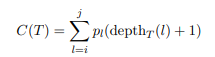

Y el costo de los subproblemas va a ser

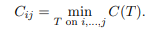

Esto se vincula con la subestructura optima explicada anteriormente y que esta nos permite resolver y guardar los subproblemas para ir combinándolos y llegar al resultado esperado, siendo este el original

**Relación de recurrencia**

Supongamos que la raíz de T en i,.....,j es k

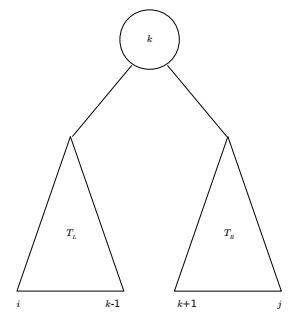

El costo de T es:

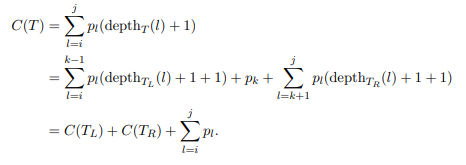

Y entonces podemos definir la siguiente ecuación de recurrencia

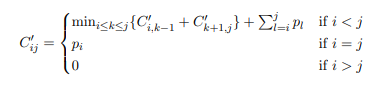

**Teorema (correctitud)**

El algoritmo BST entrega correctamente el costo esperado de una secuencia de claves y sus probabilidades

**Prueba del teorema**

Para probar el teorema se utilizara inducción matemática

**Caso base:**



Cuándo el arreglo de entrada es de tamaño 1, entonces el costo mínimo que se retorna es igual a la frecuencia del único elemento existente en el arreglo de entrada.

**Caso inductivo:** 

Para el caso inductivo hay dos casos

Caso 1:$C_{i,j}$<=$C"_{i,j}$ previo al cálculo de $C"_{i,j}$ es el costo de algun BST en i,....,j y  $C_{i,j}$ es el costo de un BST optimo

Caso 2:$C_{i,j}$>=$C"_{i,j}$ Supongamos que la raíz del BST optimo es k. Entonces

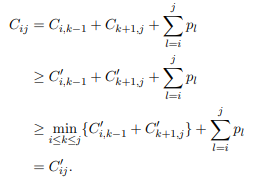

Como ambos casos son correctos tanto el inductivo como el base son correctos, nuestro algoritmo es correcto

**Conclusión**

Luego de revisar la correctitud de este algoritmo, se puede concluir que el problema final que resuelve el algoritmo es el problema original, esto se debe a que en la última iteración deberá determinar obligatoriamente el costo mínimo a retornar, ya que después de esa iteración, se habrán terminado de procesar los datos y se retornara el valor. Esto también se puede apreciar en la fórmula propuesta arriba.

#4.Tiempo de ejecución

##4.1.Tiempo de ejecucion de BST recursivo

Como es una implementación recursiva, se van a resolver distintos sub-problemas cada vez de forma repetida, además, la cantidad de árboles binarios que se pueden formar con $n$ nodos es igual a $Ω$($\frac{4^n}{n^{3/2}}$), función que representa la cantidad de sub-problemas que se deben resolver en función del tamaño de entrada.

Debido a esto, el tiempo de ejecución de este algoritmo es exponencial en $n$, siendo igual a ${\displaystyle{2n \choose n}{\frac {1}{n+1}}}$.

Por otro lado, la complejidad espacial del algoritmo es de $O(1)$ ya que no utiliza estructuras auxiliares para almacenar información.

## 4.2. Tiempo de ejecución BST dinámico

Como es una implementación dinámica, sólo se resolverá cada sub-problema una unica vez, a diferencia de la implementación recursiva, en la cuál cada sub-problema se puede llegar a resolver varias veces. Por este motivo, la cantidad de sub-problemas que se deberán resolver en función del tamaño del problema de entrada será igual a:

$C_{ij} = min_{T{i...j}} C(T)$, donde $C(T)$ representa el costo del árbol.

Debido a esto, y sumado a que este algoritmo posee tres ciclos anidados que iteran un aproximado de $n$ veces cada uno, el tiempo de ejecución de este algoritmo es igual a $O(n^3)$.

Por otro lado, la complejidad espacial del algoritmo es de $O(n^2)$ ya que utiliza una matriz cuadrada para almacenar información.

#5.Experimentos

A continuación se mostraran los experimentos realizados

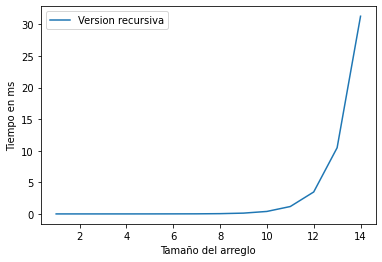

In [57]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

z=[]; w=[]

for n in range(1,15):
  a = random.sample(range(1, 1000), n)
  b=random.sample(range(1, 1000), n)
  t2 = repeat(setup="from __main__ import optimalSearchTreeRecursivo", stmt=f"optimalSearchTreeRecursivo({a}, {b},{len(a)})", repeat=1, number=20)
  z.append(n)
  w.append(t2)

plt.plot(z,w)
plt.legend(["Version recursiva"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

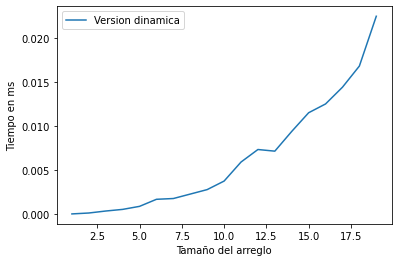

In [61]:
x=[]; y=[]

for n in range(1,20):

  a = random.sample(range(1, 1000), n)
  b = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import optimalSearchTreeDinamico", stmt=f"optimalSearchTreeDinamico({a}, {b},{len(a)})", repeat=1, number=20)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["Version dinamica"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**Analisis de resultados**

Se puede apreciar claramente que las gráficas son similares, pero es importante notar que los tiempos en ms son distintos en comparación, ya que los del dinámico van en 0.00 ascendiendo mientras que el recursivo va desde 5 en ascendiente. Esta diferencia se debe a los tiempos, el recursivo siendo **2^n** y el dinámico **n^2**